## Testing basemap functionality
### Displaying jpg MODIS images
http://lance-modis.eosdis.nasa.gov/imagery/subsets/?project=fas

#### MODIS image in region USA5 (southern Cal)
- subset: USA5
- date: 2008337 (12/02/08) 
- satellite: Aqua 
- projection: Plate Carree 
- projection center lon: 0.0000 
- projection center lat: 0.0000 
- UL lon: -126.9674 
- UL lat: +36.9407 
- UR lon: -111.7056 
- UR lat: +36.9407 
- LR lon: -111.7056 
- LR lat: +23.4509 
- LL lon: -126.9674 
- LL lat: +23.4509 
- x scale factor: +0.7660407029315025 
- ellipsoid: WGS84 

#### MODIS image in region USA5 (southern Cal)
- subset: USA1 
- date: 2008337 (12/02/08) 
- satellite: Terra 
- projection: Plate Carree 
- projection center lon: 0.0000 
- projection center lat: 0.0000 
- UL lon: -126.9674 
- UL lat: +50.4305 
- UR lon: -111.7056 
- UR lat: +50.4305 
- LR lon: -111.7056 
- LR lat: +36.9407 
- LL lon: -126.9674 
- LL lat: +36.9407 
- x scale factor: +0.7660407029315026 
- ellipsoid: WGS84 

In [1]:
####################################################################################################
# CR.MODIS_Examples.ipynb
# Karl Lapo October/2015
####################################################################################################
# Build example figures of certain met conditions
####################################################################################################

# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray
from netCDF4 import num2date, date2num
import numpy as np
from datetime import datetime, timedelta
import pickle
import pandas as pd
import xray
import scipy

# OS interaction
import sys
import os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
from matplotlib.pyplot import subplots
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph

## Directory listing
dir_data = '/Users/karllapo/gdrive/SnowHydrology/proj/CloudClimatology/data'
dir_print = '/Users/karllapo/gdrive/SnowHydrology/proj/CloudClimatology/Graphics'
dir_VIC = '/VIC_MTCLIM'

# Directory for basemap pickle files
dir_bmap = '/Users/karllapo/gdrive/SnowHydrology/proj/CloudClimatology/data/basemap'

# Directory for MODIS mosaics
dir_tif = '/Users/karllapo/Google Drive/SnowHydrology/proj/CloudClimatology/data/basemap/MODIS.mosaics/'

############
## MTCLIM ##
os.chdir(dir_data+dir_VIC)
mtclim = xray.open_dataset('CA.MTCLIM.irrad.daily.nc')

#########################
## Ground Observations ##
os.chdir(dir_data)
grobs = xray.open_dataset('grobs.daily.nc')

In [2]:
##### Basemap -- do not allow a saving/rewriting of the basemap
def build_basemap(lon,lat,dir_bmap,bmap_name='basemap.pickle',rewrite=False):
    # Lat/Lon handling - map extent
    bmap_dict = {}
    bmap_dict['lat_i'] = np.min(lat)
    bmap_dict['lon_i'] = np.min(lon)
    bmap_dict['lat_j'] = np.max(lat)
    bmap_dict['lon_j'] = np.max(lon)
    
    bmap_dict['lat_mid'] = lat[np.round(lat.size/2)]
    bmap_dict['lon_mid'] = lon[np.round(lon.size/2)]
    
    bmap_dict['lat_labels'] = np.arange(np.round(bmap_dict['lat_i']), np.round(bmap_dict['lat_j']), 2)
    bmap_dict['lon_labels'] = np.arange(np.round(bmap_dict['lon_i']), np.round(bmap_dict['lon_j']), 2)
    
    os.chdir(dir_bmap)
    bmap = Basemap(llcrnrlon=bmap_dict['lon_i'],llcrnrlat=bmap_dict['lat_i'],\
                    urcrnrlon=bmap_dict['lon_j'],urcrnrlat=bmap_dict['lat_j'],\
                    rsphere=(6378137.00,6356752.3142),resolution='l',projection='cyl',\
                    lat_1=bmap_dict['lat_mid'],lon_0=bmap_dict['lon_mid'])
    
    return bmap,bmap_dict

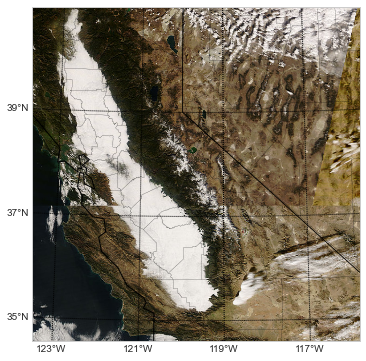

In [37]:
# ---------------------------------------------- #
# Demonstrate that matplotlib does not properly display geotiffs
# ---------------------------------------------- #
##### Basemap
lat = mtclim.latitude.values
lon = mtclim.longitude.values
fig = plt.figure(figsize=(12,6))

bmp,bmd = build_basemap(lon,lat,dir_bmap,'CA.Domain.bmp.pickle')
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']

## USA Region 1 (Northern California)
# This code creates an upside down figure, does not scale to map extent
#Corner Coordinates:
# LL lat: +36.9407
# LL lon: -126.9674
# UR lon: -111.7056
# UR lat: +50.4305
# extent = [left, right, bottom, top]
USA1 = plt.imread('/Users/karllapo/Downloads/USA1.2008337.terra.1km/USA1.2008337.terra.1km.jpg')
x0, y0 = bmp(-126.9674, 36.9407)
x1, y1 = bmp(-111.7056, 50.4305)
extent = [x0, x1, y0, y1]
plt.imshow(USA1,extent=extent,origin='upper')

## USA Region 5 (Southern California)
# This code creates an upside down figure, does not scale to map extent
#Corner Coordinates:
# LL lat: +23.4509 
# LL lon: -126.9674 
# UR lon: -111.7056 
# UR lat: +36.9407 
# extent = [left, right, bottom, top]
USA5 = plt.imread('/Users/karllapo/Downloads/USA5.2008337.aqua.1km/USA5.2008337.aqua.1km.jpg')
x0, y0 = bmp(-126.9674, 23.4509)
x1, y1 = bmp(-111.7056, 36.9407)
extent = [x0, x1, y0, y1]
plt.imshow(USA5,extent=extent,origin='upper')

## Formatting
bmp.drawparallels(lat_labels,labels=[1,0,0,0])
bmp.drawmeridians(lon_labels,labels=[0,0,0,1]) 

# political boundaries.
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcounties()

#### Images not projected correctly
Matplotlib basemap doesn't appear to able to plot a georeferenced image correct, which is disappointing

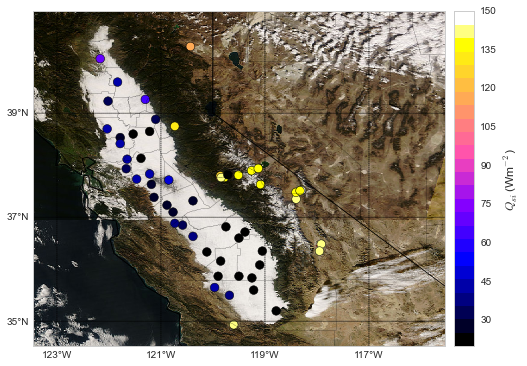

In [28]:
# ---------------------------------------------- #
# Tule Fog
# ---------------------------------------------- #
##### Basemap using the converted geotiff image from arcgis
lat = mtclim.latitude.values
lon = mtclim.longitude.values
fig = plt.figure(figsize=(12,6))
bmp,bmd = build_basemap(lon,lat,dir_bmap)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']
d = pd.date_range(start='2008-12-03',freq='D',periods=1)

## Converted geotiff from ArcGIS
#Corner Coordinates:
# LL lat: +36.9407
# LL lon: -126.9674
# UR lon: -111.7056
# UR lat: +50.4305
# extent = [left, right, bottom, top]
valfog_CA = gdal.Open("/Users/karllapo/gdrive/valfog_ca/valfog_CA1.tif")
valfog_CA = np.rollaxis(valfog_CA.ReadAsArray(), 0, 3)/256.
x0, y0 = bmp(-123.5, 34.5)
x1, y1 = bmp(-115, 41)
extent = [x0, x1, y0, y1]
bmp.imshow(valfog_CA,origin='upper')

## Plot station data
cmap = cmap_discretize(cm.gnuplot2,25)
im=bmp.scatter(grobs.longitude.values,grobs.latitude.values,c=grobs.grobs.loc[{'time':d}], \
                s=75, cmap=cmap, vmin = 20, vmax = 150, linewidths=.5 ,latlon=True)

## Formatting
bmp.drawparallels(lat_labels,labels=[1,0,0,0])
bmp.drawmeridians(lon_labels,labels=[0,0,0,1]) 

# political boundaries.
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcounties()

# Colorbar
cb = bmp.colorbar(im,"right", size="5%", pad='2%')
cb.set_label('$Q_{si}$ (Wm$^{-2}$)', fontsize=12)

os.chdir(dir_print)
fig.savefig('MODISExample.TuleFog.png')

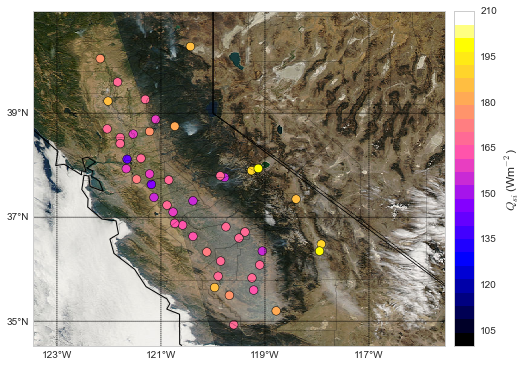

In [29]:
# ---------------------------------------------- #
# Aerosols
# ---------------------------------------------- #
##### Basemap using the converted geotiff image from arcgis
lat = mtclim.latitude.values
lon = mtclim.longitude.values
fig = plt.figure(figsize=(12,6))
bmp,bmd = build_basemap(lon,lat,dir_bmap)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']
d = pd.date_range(start='2005-10-23',freq='D',periods=1)

## Converted geotiff from ArcGIS
#Corner Coordinates:
# LL lat: +36.9407
# LL lon: -126.9674
# UR lon: -111.7056
# UR lat: +50.4305
# extent = [left, right, bottom, top]
calaero = gdal.Open("/Users/karllapo/gdrive/valfog_ca/valaero1.tif")
calaero = np.rollaxis(calaero.ReadAsArray(), 0, 3)/256.
x0, y0 = bmp(-123.5, 34.5)
x1, y1 = bmp(-115, 41)
extent = [x0, x1, y0, y1]
bmp.imshow(calaero,origin='upper')

## Plot station data
cmap = cmap_discretize(cm.gnuplot2,25)
im=bmp.scatter(grobs.longitude.values,grobs.latitude.values,c=grobs.grobs.loc[{'time':d}], \
                s=75, cmap=cmap, vmin=100,vmax=210, linewidths=.5 ,latlon=True)

## Formatting
bmp.drawparallels(lat_labels,labels=[1,0,0,0])
bmp.drawmeridians(lon_labels,labels=[0,0,0,1]) 

# political boundaries.
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcounties()

# Colorbar
cb = bmp.colorbar(im,"right", size="5%", pad='2%')
cb.set_label('$Q_{si}$ (Wm$^{-2}$)', fontsize=12)

os.chdir(dir_print)
fig.savefig('MODISExample.Aerosols.png')

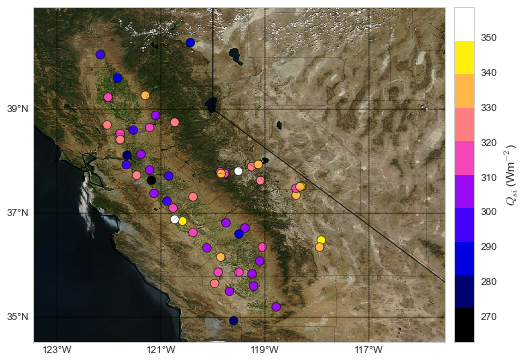

In [30]:
# ---------------------------------------------- #
# Clear
# ---------------------------------------------- #
##### Basemap using the converted geotiff image from arcgis
lat = mtclim.latitude.values
lon = mtclim.longitude.values
fig = plt.figure(figsize=(12,6))
bmp,bmd = build_basemap(lon,lat,dir_bmap)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']
d = pd.date_range(start='2009-08-15',freq='D',periods=1)

## Converted geotiff from ArcGIS
#Corner Coordinates:
# LL lat: +36.9407
# LL lon: -126.9674
# UR lon: -111.7056
# UR lat: +50.4305
# extent = [left, right, bottom, top]
calclear = gdal.Open("/Users/karllapo/gdrive/MODIS_clear/comboclip.tif")
calclear = np.rollaxis(calclear.ReadAsArray(), 0, 3)/256.
x0, y0 = bmp(-123.5, 34.5)
x1, y1 = bmp(-115, 41)
extent = [x0, x1, y0, y1]
bmp.imshow(calclear,origin='upper')

## MTCLIM
# lon_rad,lat_rad = np.meshgrid(mtclim.longitude.values,mtclim.latitude.values)
# SW_for_plot = np.squeeze(mtclim.SWdwn.loc[{'time':d}].values)
# SW_for_plot = np.ma.masked_where(np.isnan(SW_for_plot),SW_for_plot)
# bmp.pcolormesh(lon_rad,lat_rad,SW_for_plot,\
#                 cmap=cmap,vmin=260,vmax=360,shading='flat',latlon=True,\
#                 alpha=.4, linewidth=0.0015625)

## Plot station data
cmap = cmap_discretize(cm.gnuplot2,10)
grobs_plot_values = grobs.grobs.loc[{'time':d}].values
grobs_plot_values[np.nonzero(grobs_plot_values < 255)] = np.nan
im=bmp.scatter(grobs.longitude.values,grobs.latitude.values,c=grobs_plot_values, \
                s=75, cmap=cmap, linewidths=.5, latlon=True)

## Formatting
bmp.drawparallels(lat_labels,labels=[1,0,0,0])
bmp.drawmeridians(lon_labels,labels=[0,0,0,1]) 

# political boundaries.
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcounties()

# Colorbar
cb = bmp.colorbar(im,"right", size="5%", pad='2%')
cb.set_label('$Q_{si}$ (Wm$^{-2}$)', fontsize=12)

os.chdir(dir_print)
fig.savefig('MODISExample.Clear.png')

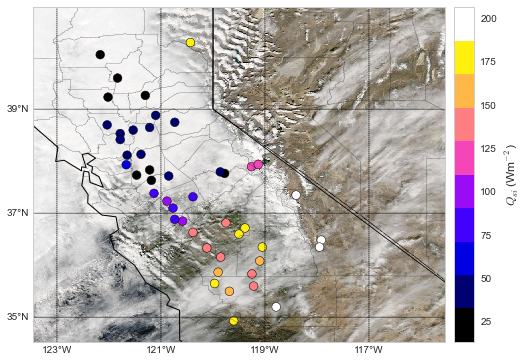

In [32]:
# ---------------------------------------------- #
# Cloudy
# ---------------------------------------------- #
##### Basemap using the converted geotiff image from arcgis
lat = mtclim.latitude.values
lon = mtclim.longitude.values
fig = plt.figure(figsize=(12,6))
bmp,bmd = build_basemap(lon,lat,dir_bmap)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']
d = pd.date_range(start='2006-03-06',freq='D',periods=1)

## Converted geotiff from ArcGIS
#Corner Coordinates:
# LL lat: +36.9407
# LL lon: -126.9674
# UR lon: -111.7056
# UR lat: +50.4305
# extent = [left, right, bottom, top]
calcloud = gdal.Open(dir_data+"/MODIS_ExampleImages.RapidResponseTiffs/cloud.tif")
calcloud = np.rollaxis(calcloud.ReadAsArray(), 0, 3)/256.
x0, y0 = bmp(-123.5, 34.5)
x1, y1 = bmp(-115, 41)
extent = [x0, x1, y0, y1]
bmp.imshow(calcloud,origin='upper')

## MTCLIM
# lon_rad,lat_rad = np.meshgrid(mtclim.longitude.values,mtclim.latitude.values)
# SW_for_plot = np.squeeze(mtclim.SWdwn.loc[{'time':d}].values)
# SW_for_plot = np.ma.masked_where(np.isnan(SW_for_plot),SW_for_plot)
# bmp.pcolormesh(lon_rad,lat_rad,SW_for_plot,\
#                 cmap=cmap,vmin=25,vmax=200,shading='flat',latlon=True,\
#                 alpha=.4, linewidth=0.0015625)

## Plot station data
cmap = cmap_discretize(cm.gnuplot2,10)
grobs_plot_values = grobs.grobs.loc[{'time':d}].values
im=bmp.scatter(grobs.longitude.values,grobs.latitude.values,c=grobs_plot_values, \
                s=75, cmap=cmap, linewidths=.5, latlon=True)

## Formatting
bmp.drawparallels(lat_labels,labels=[1,0,0,0])
bmp.drawmeridians(lon_labels,labels=[0,0,0,1]) 

# political boundaries.
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcounties()

# Colorbar
cb = bmp.colorbar(im,"right", size="5%", pad='2%')
cb.set_label('$Q_{si}$ (Wm$^{-2}$)', fontsize=12)

os.chdir(dir_print)
fig.savefig('MODISExample.Cloudy.png')

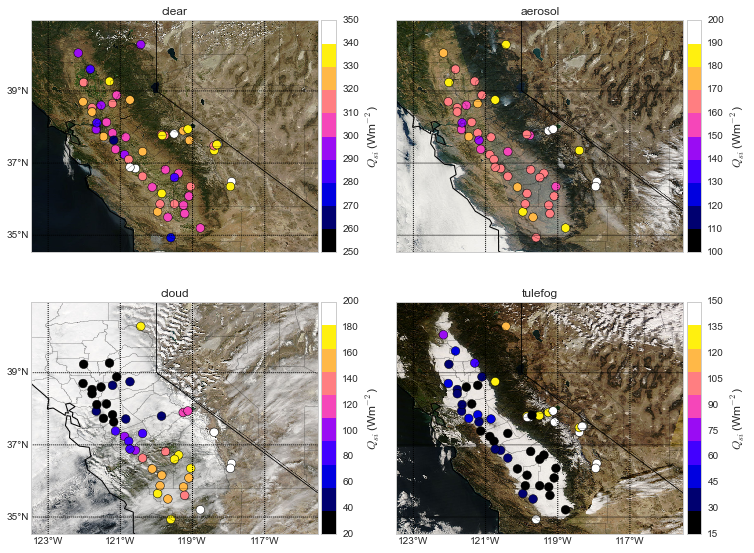

In [87]:
# ---------------------------------------------- #
# CombinedPlot
# ---------------------------------------------- #
##### Basemap using the converted geotiff image from arcgis
# Corner Coordinates:
# LL lat: +36.9407
# LL lon: -126.9674
# UR lon: -111.7056
# UR lat: +50.4305
# extent = [left, right, bottom, top]
flag_mtlcim = 0
tif_dates = {'clear':'2009-08-15','cloud':'2006-03-06','tulefog':'2008-12-03','aerosol':'2005-10-23'}
clims = {'clear':(250,350),'cloud':(20,200),'tulefog':(15,150),'aerosol':(100,200)}

##### Figure
fig = plt.figure(figsize=(12,10))
gs = matplotlib.gridspec.GridSpec(2,2,wspace=.2,hspace=.02)
axdict = {}
axes = []
for tif,ax in zip(tif_dates.keys(),gs):
    axdict[tif] = plt.subplot(ax)
    axes.append(plt.subplot(ax))

##### Basemap
lat = mtclim.latitude.values
lon = mtclim.longitude.values
bmp,bmd = build_basemap(lon,lat,dir_bmap)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']


for tif,dMODIS in dates.iteritems():
    ax = axdict[tif]
    plt.sca(ax)
    d = pd.date_range(start=dMODIS,freq='D',periods=1)
    cmin = clims[tif][0]
    cmax = clims[tif][1]

    MODISimage = gdal.Open('+tif+'.tif')
    MODISimage = np.rollaxis(MODISimage.ReadAsArray(), 0, 3)/256.
    x0, y0 = bmp(-123.5, 34.5)
    x1, y1 = bmp(-115, 41)
    extent = [x0, x1, y0, y1]
    bmp.imshow(MODISimage,origin='upper',ax=ax)
        
    ## MTCLIM
    if flag_mtlcim:
        lon_rad,lat_rad = np.meshgrid(mtclim.longitude.values,mtclim.latitude.values)
        SW_for_plot = np.squeeze(mtclim.SWdwn.loc[{'time':d}].values)
        SW_for_plot = np.ma.masked_where(np.isnan(SW_for_plot),SW_for_plot)
        bmp.pcolormesh(lon_rad,lat_rad,SW_for_plot,\
                        cmap=cmap,vmin=cmin,vmax=cmax,shading='flat',latlon=True,\
                        alpha=.4, linewidth=0.0015625,ax=ax)

    ## Plot station data
    cmap = cmap_discretize(cm.gnuplot2,10)
    grobs_plot_values = grobs.grobs.loc[{'time':d}].values
    grobs_plot_values[np.nonzero(grobs_plot_values < cmin)] = np.nan
    im=bmp.scatter(grobs.longitude.values,grobs.latitude.values,c=grobs_plot_values, \
                    s=75, cmap=cmap, linewidths=.5, latlon=True, vmin=cmin,vmax=cmax,ax=ax)

    ## Formatting
    if ax == axes[0] or ax == axes[2]:
        bmp.drawparallels(lat_labels,labels=[1,0,0,0])
    else:
        bmp.drawparallels(lat_labels,labels=[0,0,0,0])
    
    if ax == axes[2] or ax == axes[3]:
        bmp.drawmeridians(lon_labels,labels=[0,0,0,1]) 
    else:
        bmp.drawmeridians(lon_labels,labels=[0,0,0,0])
        
    # political boundaries.
    bmp.drawstates()
    bmp.drawcoastlines()
    bmp.drawcounties()

    # Colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    cb.set_label('$Q_{si}$ (Wm$^{-2}$)', fontsize=12)
    
    # title
    ax.set_title(tif)

os.chdir(dir_print)
if flag_mtlcim:
    fname = 'MODISExample.All_mtclim.png'
else:
    fname = 'MODISExample.All.png'
fig.savefig(fname,dpi=300)